In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [26]:
df=load_breast_cancer()
print(df)
# df.data.shape
# df.target_names.shape

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [27]:
dataframe=pd.DataFrame(data=df.data,columns=df.feature_names)


In [28]:
dataframe.shape

(569, 30)

In [29]:
dataframe.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [30]:
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
dataframe['label']=df.target

In [32]:
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


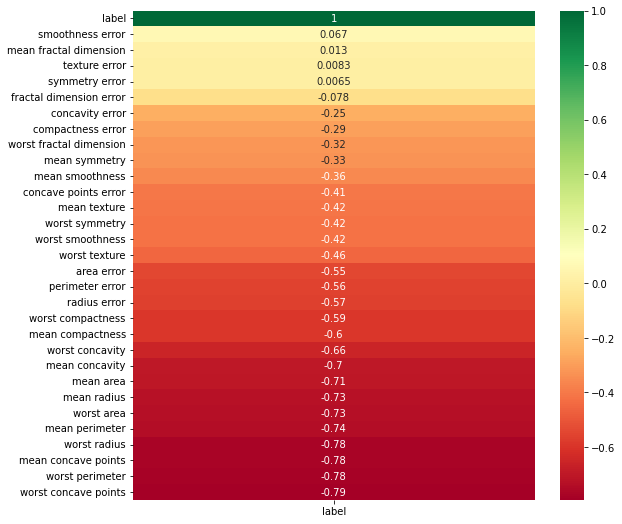

In [33]:
corr=dataframe.corr()['label'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(9,9))
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()

<AxesSubplot:>

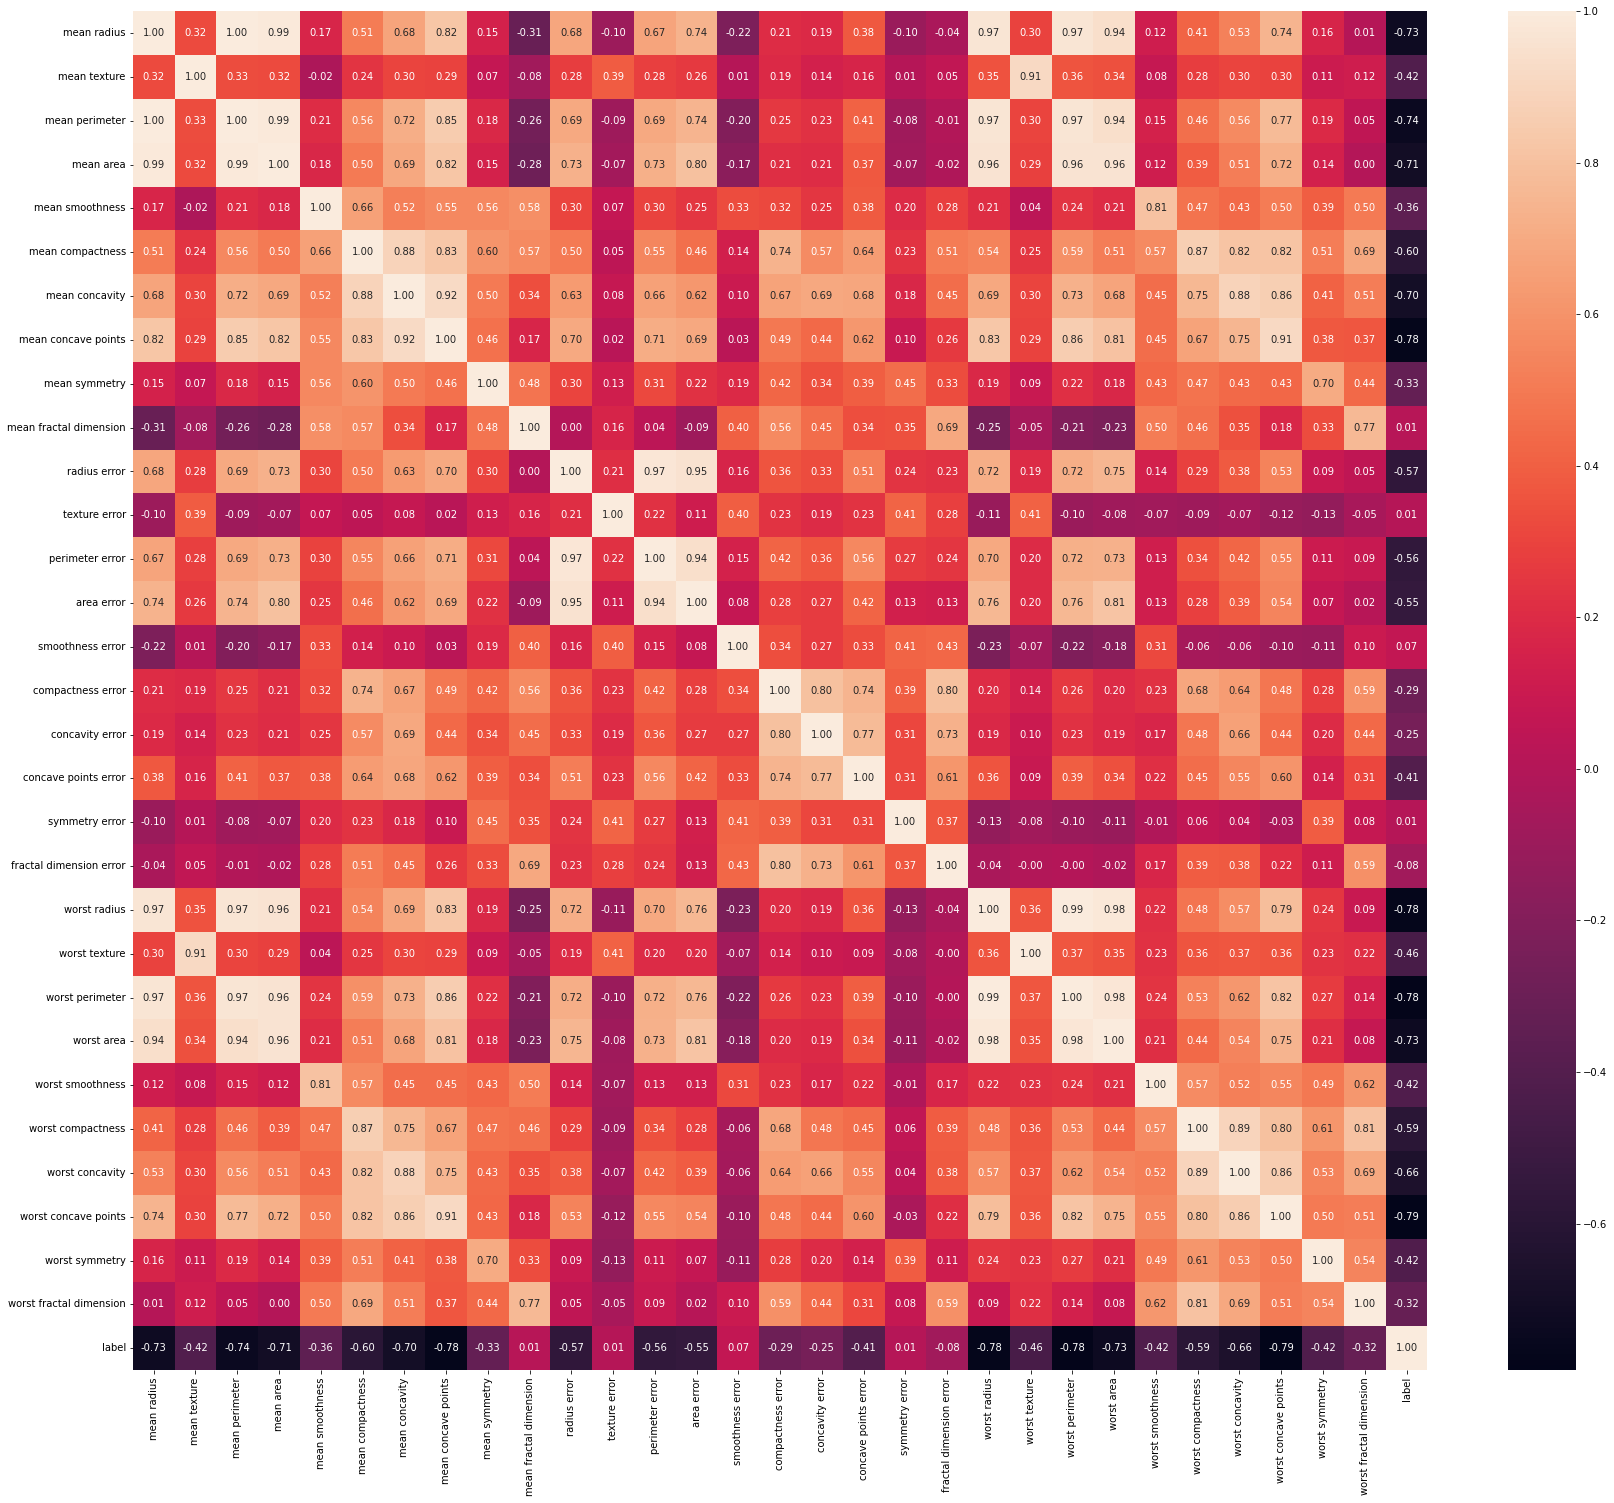

In [34]:
plt.figure(figsize=(29,25))
sns.heatmap(dataframe.corr(),annot=True,fmt='.2f')

In [35]:
# to find imp feature from heatmap by correlation

cor_diagnosis = abs(dataframe.corr()['label']) 

cor_diagnosis[cor_diagnosis > 0.7].keys()

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concave points',
       'worst radius', 'worst perimeter', 'worst area', 'worst concave points',
       'label'],
      dtype='object')

In [36]:
X=dataframe[['mean radius', 'mean perimeter', 'mean area', 'mean concave points',
       'worst radius', 'worst perimeter', 'worst area', 'worst concave points']]
X

,mean radius,mean perimeter,mean area,mean concave points,worst radius,worst perimeter,worst area,worst concave points
0,17.99,122.80,1001.0,0.14710,25.380,184.60,2019.0,0.2654
1,20.57,132.90,1326.0,0.07017,24.990,158.80,1956.0,0.1860
2,19.69,130.00,1203.0,0.12790,23.570,152.50,1709.0,0.2430
3,11.42,77.58,386.1,0.10520,14.910,98.87,567.7,0.2575
4,20.29,135.10,1297.0,0.10430,22.540,152.20,1575.0,0.1625
...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.13890,25.450,166.10,2027.0,0.2216
565,20.13,131.20,1261.0,0.09791,23.690,155.00,1731.0,0.1628
566,16.60,108.30,858.1,0.05302,18.980,126.70,1124.0,0.1418
567,20.60,140.10,1265.0,0.15200,25.740,184.60,1821.0,0.2650


In [37]:
y=dataframe['label']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [39]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(426, 8)
(143, 8)
(426,)
(143,)


In [40]:
model=KNeighborsClassifier().fit(X_train_scaled,y_train)

In [41]:
pred=model.predict(X_test_scaled)
print(pred.shape)
print(y_test.shape)

(143,)
(143,)


In [42]:
print(accuracy_score(pred,y_test))

0.958041958041958


In [43]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [44]:
for i in X_test.columns:
    print("<th scope='col'>{}</th>".format(i.capitalize()))

<th scope='col'>Mean radius</th>
<th scope='col'>Mean perimeter</th>
<th scope='col'>Mean area</th>
<th scope='col'>Mean concave points</th>
<th scope='col'>Worst radius</th>
<th scope='col'>Worst perimeter</th>
<th scope='col'>Worst area</th>
<th scope='col'>Worst concave points</th>


In [47]:
for i in range(3):
    print("<tr>")
    print( "<td scope='row'>{}</td>".format(i+1))
    row1 =  [np.round(x,2) for x in X_test[y_test == 0].values[i]]
    for i in row1:
        print( "<td scope='col'>{}</td>".format(i))
    print("</tr>")
    print()

<tr>
<td scope='row'>1</td>
<td scope='col'>18.94</td>
<td scope='col'>123.6</td>
<td scope='col'>1130.0</td>
<td scope='col'>0.08</td>
<td scope='col'>24.86</td>
<td scope='col'>165.9</td>
<td scope='col'>1866.0</td>
<td scope='col'>0.18</td>
</tr>

<tr>
<td scope='row'>2</td>
<td scope='col'>15.46</td>
<td scope='col'>101.7</td>
<td scope='col'>748.9</td>
<td scope='col'>0.08</td>
<td scope='col'>19.26</td>
<td scope='col'>124.9</td>
<td scope='col'>1156.0</td>
<td scope='col'>0.15</td>
</tr>

<tr>
<td scope='row'>3</td>
<td scope='col'>20.6</td>
<td scope='col'>140.1</td>
<td scope='col'>1265.0</td>
<td scope='col'>0.15</td>
<td scope='col'>25.74</td>
<td scope='col'>184.6</td>
<td scope='col'>1821.0</td>
<td scope='col'>0.26</td>
</tr>



In [46]:
pred=model.predict([[17.99,	122.80	,1001.0	,0.14710,	25.380	,184.60	,2019.0,	0.2654]])
pred


array([0])